In [1]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

In [2]:
def f(x):
    return np.sinh(x)

In [3]:
def phi(x):
    return 1 if 0 <= x <= 1 else 0

In [4]:
def psi_ij(x, j, i):
    start = i * 2 ** (-j)
    end = (i + 1) * 2 ** (-j)
    half_interval = 0.5 * 2 ** (-j) 
    scale = 2 ** (j / 2) 
    
    if start <= x < start + half_interval:
        return scale
    elif start + half_interval <= x <= end:
        return -scale
    else:
        return 0

In [5]:
def phi_ij(x, j, i):
    start = i * 2 ** (-j)
    end = (i + 1) * 2 ** (-j)
    scale = 2 ** (j / 2) 
    
    return scale if start <= x <= end else 0

In [6]:
c_00 = quad(lambda x: f(x) * phi(x), 0, 1)[0]
print(f"Коэффициент c_00: {c_00}")

def compute_dij(j, i):
    left = i * 2 ** (-j)
    med = (i + 0.5) * 2 ** (-j)
    right = (i + 1) * 2 ** (-j)

    integral1 = quad(lambda x: f(x), left, med)[0]
    integral2 = quad(lambda x: f(x), med, right)[0]
    
    integral = quad(lambda x: f(x) * psi_ij(x, j, i), left, right)[0]
    
    return integral

Коэффициент c_00: 0.5430806348152437


In [7]:
def wavelet_approximation(x, j_max):
    approx = c_00 * phi(x)
    for j in range(j_max + 1):
        for i in range(2 ** j):
            approx += d_ij[(j, i)] * psi_ij(x, j, i)
    return approx

In [8]:
def compute_integral_square(f, a, b):
    result = quad(lambda x: f(x) ** 2, a, b)[0]
    return result

Коэффициент d_00: -0.28782870440248226
Коэффициент d_10: -0.09164070713407442
Коэффициент d_11: -0.1150321745344374
Коэффициент d_20: -0.03153548845630291
Коэффициент d_21: -0.033516743353560835
Коэффициент d_22: -0.03760372786402563
Коэффициент d_23: -0.04405321169296428
Интеграл f(x)^2: 0.4067151019617547
Сумма квадратов коэффициентов: 0.40488494429843697
Равенство Парсеваля (с ошибкой, не превышающей 0.003): True


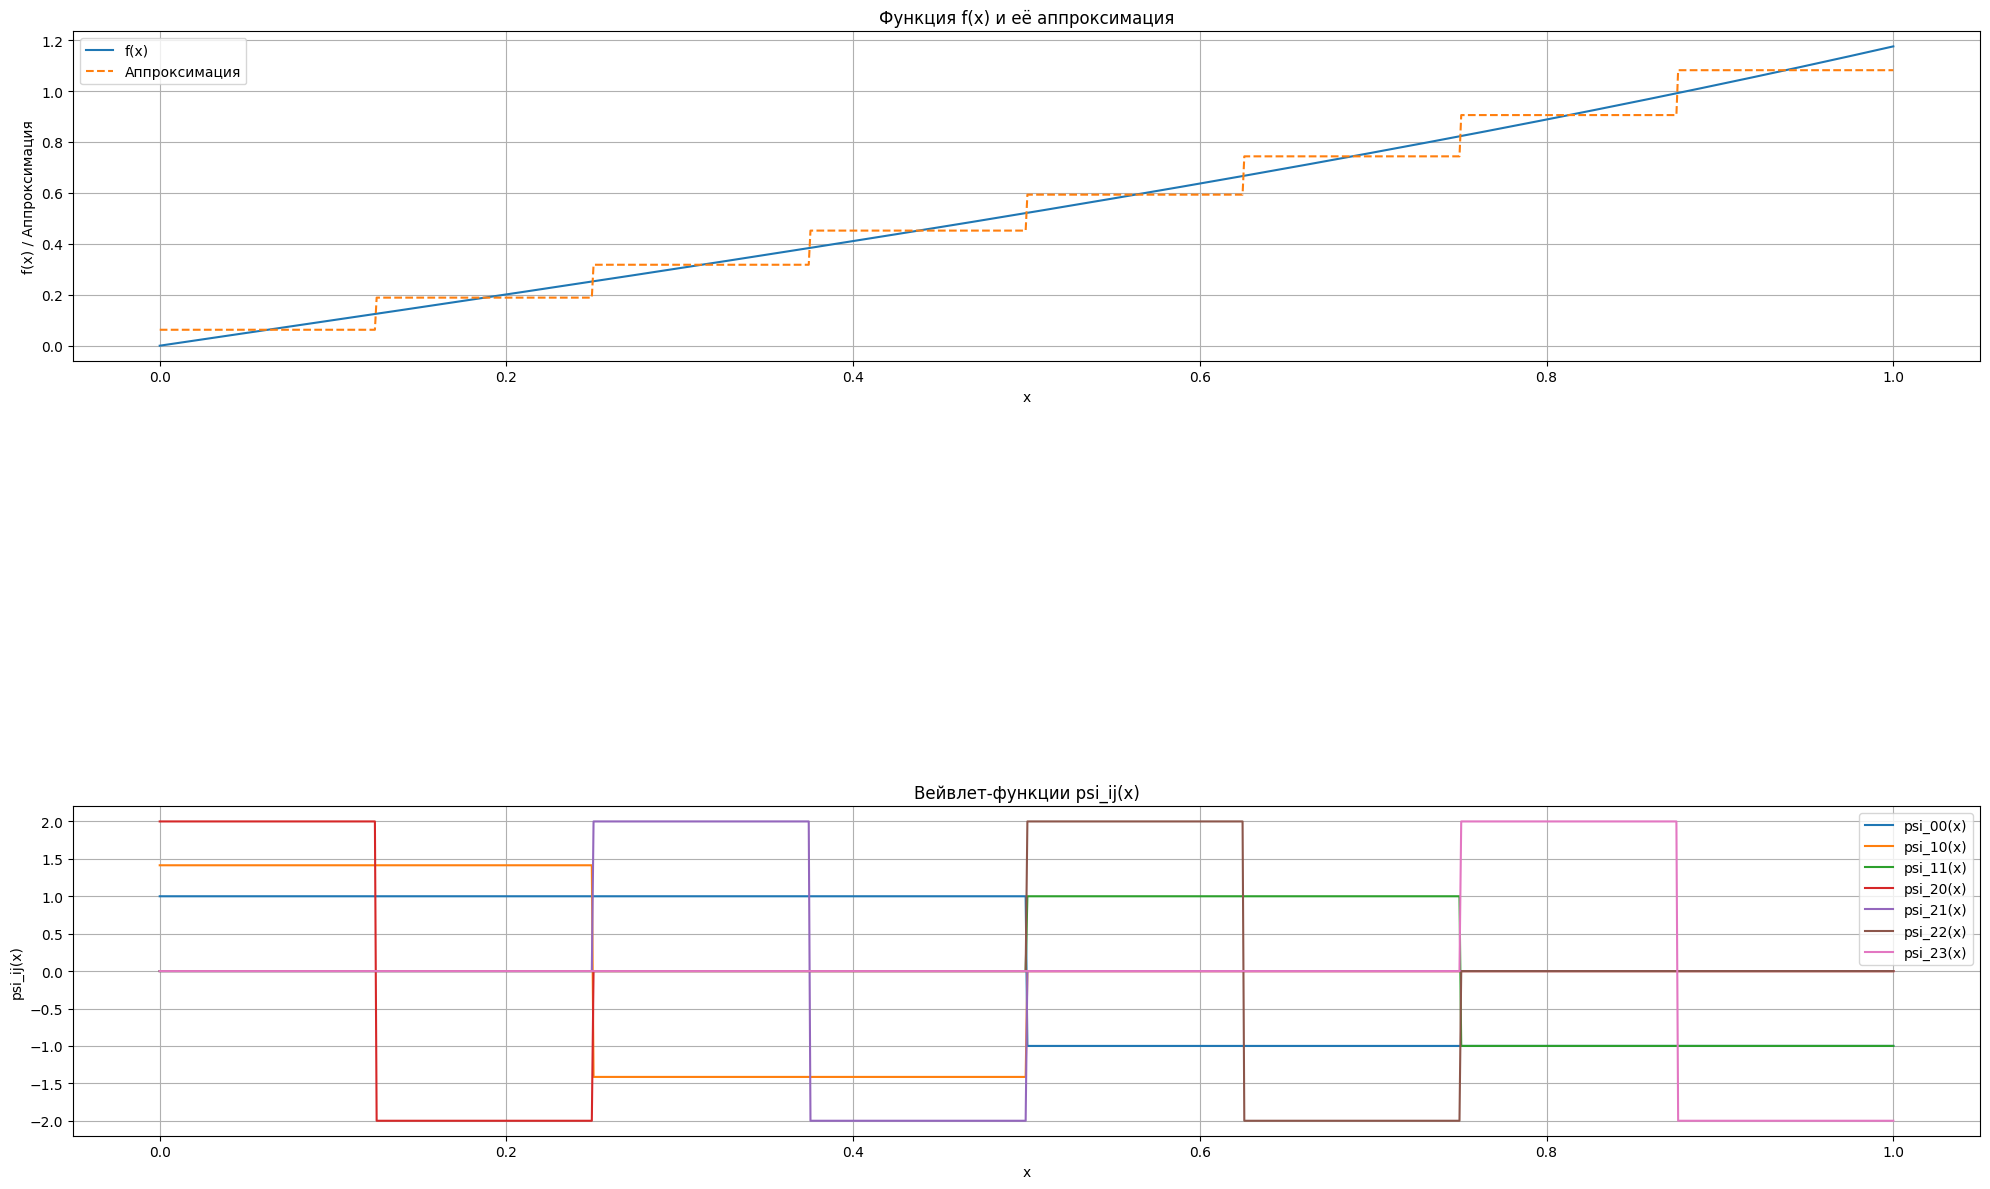

In [9]:
j_max = 2
d_ij = {(j, i): compute_dij(j, i) for j in range(j_max + 1) for i in range(2 ** j) }

for j in range(j_max + 1):
    for i in range(2**j):
        print(f"Коэффициент d_{j}{i}: {d_ij[(j, i)]}")

integral_f2 = compute_integral_square(f, 0, 1)
sum_squares_dij = sum(value ** 2 for value in d_ij.values())
parity_check = c_00 ** 2 + sum_squares_dij

print(f"Интеграл f(x)^2: {integral_f2}")
print(f"Сумма квадратов коэффициентов: {parity_check}")
print(f"Равенство Парсеваля (с ошибкой, не превышающей 0.003): {np.isclose(integral_f2, parity_check, atol=0.003)}")

x_vals = np.linspace(0, 1, 1000)

f_vals = np.vectorize(f)(x_vals)
phi_00_vals = np.vectorize(lambda x: phi(x))(x_vals)
wavelet_approx_vals = np.vectorize(lambda x: wavelet_approximation(x, j_max))(x_vals)

plt.figure(figsize=(20, 12))

plt.subplot(3, 1, 1)
plt.plot(x_vals, f_vals, label='f(x)')
plt.plot(x_vals, wavelet_approx_vals, label='Аппроксимация', linestyle='--')
plt.title('Функция f(x) и её аппроксимация')
plt.xlabel('x')
plt.ylabel('f(x) / Аппроксимация')
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 3)
for j in range(j_max + 1):
    for i in range(2**j):
        psi_vals = np.vectorize(lambda x: psi_ij(x, j, i))(x_vals)
        plt.plot(x_vals, psi_vals, label=f'psi_{j}{i}(x)')
plt.title('Вейвлет-функции psi_ij(x)')
plt.xlabel('x')
plt.ylabel('psi_ij(x)')
plt.legend()
plt.grid(True)


plt.tight_layout()
plt.show()